## Trabajo práctico 1.

Jerónimo Barragán. LU: 1472/21.
Manuel Max Gonzalez. Lu: 1229/21.

Importamos las librerías que vamos a usar.

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import null_space

## Ejercicio 1

Definimos la función pedida.

In [2]:
#A debe ser cuadrada, diagonalizable y tener un único autovalor de módulo máximo.
def metodoDeLaPotencia(A, k):
    res = np.array([])
    size = len(A)
    v = np.random.rand(size)
    m = v / np.linalg.norm(v, 2)
    for i in range(k):
        m = A@m
        m = m / np.linalg.norm(m, 2)
        r_k = (m@(A@m))/(m@m)
        res = np.append(res, r_k)
    return(res)

Para verificar resultados, definimos una función que calcula el autovalor de módulo máximo de una matriz cuadrada A. 

In [3]:
def avalDeModuloMax(A):
    avals = np.linalg.eigvals(A)
    absAvalDeModuloMax = np.linalg.norm(avals, np.inf)
    return(avals[abs(avals) == absAvalDeModuloMax])

Acá creamos una matriz aleatoria $M \in \mathbb{R}^{3x3}$ y probamos aplicar el método de la potencia realizando 100 iteraciones, y comparamos con el autovalor de módulo máximo. 

In [4]:
M = np.random.random((3,3))
avalModMax = avalDeModuloMax(M)
print("Método de la potencia: ", metodoDeLaPotencia(M, 100))
print("Autovalor de módulo máximo: ", avalModMax)

Método de la potencia:  [1.53996717 1.53824272 1.53784775 1.53762806 1.53766443 1.53765063
 1.5376545  1.53765332 1.53765367 1.53765356 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359 1.53765359
 1.53765359 1.53765359 1.53765359 1.53

En general, el método parece converger al autovalor de módulo máximo, pero puede fallar cuando generamos matrices aleatorias que casualmente no son diagonalizables, no haya un único autovalor de módulo máximo, o la escritura del vector aleatorio $v^{(0)}$ (generado al inicio en la implementación del método) en una base de autovectores tenga coeficiente nulo asociado al autovector de autovalor de módulo máximo. Igualmente, son casos muy particulares que tienen pocas chances de ocurrir.

## Ejercicio 2

Generamos una matriz aleatoria $A \in \mathbb{R} ^{100x100}$. 
Aplicamos el método de la potencia a la matriz $A$ con 100 iteraciones, obteniendo un vector que en la posición $k$ contiene la aproximación (al autovalor de módulo máximo de A) obtenida luego de $k$ iteraciones.
Como la matriz $A$ generada aleatoriamente podría tener como autovalor de módulo máximo un número complejo que no sea real, graficamos las aproximaciones hacia el módulo del autovalor de módulo máximo, en función del número de iteraciones.

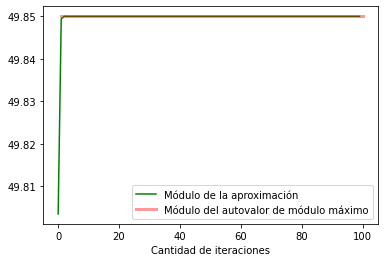

In [5]:
A = np.random.random((100, 100))
aproxs = metodoDeLaPotencia(A, 100)
aval = avalDeModuloMax(A)
plt.plot(abs(aproxs), color = "green", alpha = 1, label = "Módulo de la aproximación")
plt.plot(np.arange(1,101,1), [abs(aval)]*100, color = "red", label = "Módulo del autovalor de módulo máximo", alpha = 0.4, linewidth = 3)
plt.xlabel("Cantidad de iteraciones")
plt.legend()

Creemos que el método converge rápidamente dado que, en general, en menos de 10 iteraciones el gráfico sube abruptamente y se estanca sobre la recta horizontal correspondiente al módulo del autovalor de módulo máximo calculado con numpy. Como el autovalor de módulo máximo es único, la convergencia hacia el módulo del mismo garantiza la convergencia hacia el autovalor en sí.

## Ejercicio 3

Definimos la matriz $B$ pedida y aplicamos el método de la potencia 100 veces.

In [6]:
C = np.random.random((100, 100))
Ctrans = C.transpose()
A = (C + Ctrans)/2
B = A + 500*np.identity(100)
avalModMaxB = avalDeModuloMax(B)
mp = metodoDeLaPotencia(B, 100)

Graficamos los errores en función del número de iteración.

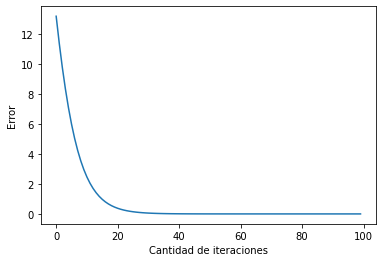

In [7]:
def vectorErrores (B):
    errores = np.array([])
    aproxs = metodoDeLaPotencia(B, 100)
    size = len(aproxs)
    for i in range(size): 
        errores = np.append(errores, abs(avalModMaxB - aproxs[i]))
    return(errores)

errores = vectorErrores(B)

plt.xlabel("Cantidad de iteraciones")
plt.ylabel("Error")
plt.plot(errores)

Si el error en el paso inicial es $e_0$, y sabemos que en cada paso se multiplica por aproximadamente $(\lambda_2 / \lambda_1)^2$ (con $\lambda_1$ y $\lambda_2$ los autovalores de mayor y segundo mayor módulo, respectivamente), entonces la función graficada se parece a $f(x) = e_0 (\lambda_2 ^2 / \lambda_1 ^2)^x$, que es una exponencial con base menor que 1, y su gráfico tiene la pinta del obtenido arriba.

Tomando $log(f(x))$, en cualquier base mayor que $1$ obtenemos una recta que crece si $f(x)$ lo hace, y decrece si no. La pendiente de esta recta resulta ser $2ln(\lambda_2 / \lambda_1)$ y nos da información acerca de qué tan rápido el error disminuye o aumenta (nos da información acerca de la velocidad de convergencia). Entonces, podemos tomar logaritmo natural a cada elemento del vector de errores y graficar la función obtenida.

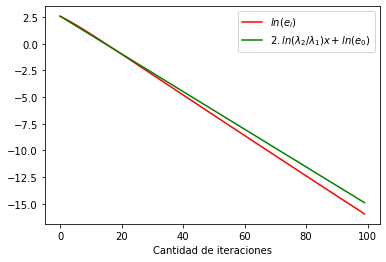

In [8]:
#np.log calcula logaritmo natural.
logErrores = np.log(errores)
plt.plot(logErrores, color = "red", label = "$ln(e_i)$")

v = np.array([])
avals = np.linalg.eigvals(B)
absAvals = sorted(abs(avals))
aval1 = avals[abs(avals) == (absAvals[len(avals)-1])]
aval2 = avals[abs(avals) == (absAvals[len(avals)-2])]
pendiente = 2*np.log(aval2/aval1)
for i in range(len(logErrores)):
    v = np.append(v, pendiente*i+logErrores[0])
    
plt.plot(v, color = "green", alpha = 1, label = "$2.ln(λ_2/λ_1)x + ln(e_0)$")
plt.xlabel("Cantidad de iteraciones")
plt.legend()

Vemos que graficando $ln(e_i)$ (donde $e_i$ es el error obtenido en el paso $i$-ésimo) obtenemos una recta decreciente, lo cual tiene sentido porque esperamos que el error en cada paso disminuya, es decir, que el método de la potencia converja efectivamente. Comparando la recta verde con la roja, vemos que sus pendientes son bastante similares dado que se superponen considerablemente: esto quiere decir que la pendiente de la recta roja es aproximadamente la esperada.

## Ejercicio 4

Repetimos el experimento para las matrices pedidas.

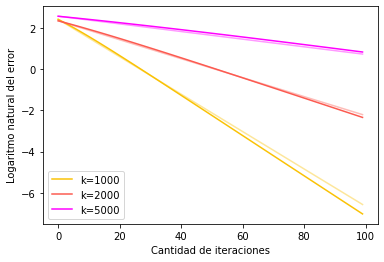

In [9]:
ks = [1000,2000,5000]
colores = ['#fac205', '#fc5a50', '#ff00ff']
for i in range(0, len(ks)):
    k = ks[i]
    B = A + k*np.identity(100)
    avalModMaxB = avalDeModuloMax(B)
    errores = vectorErrores(B)
    logErrores = np.log(errores)
    plt.plot(logErrores, color = colores[i], label = ("k=" + str(k)))

    #Graficamos también, con el mismo color pero más claro, la recta esperada.
    v = np.array([])
    avals = np.linalg.eigvals(B)
    absAvals = sorted(abs(avals))
    aval1 = avals[abs(avals) == (absAvals[len(avals)-1])]
    aval2 = avals[abs(avals) == (absAvals[len(avals)-2])]
    pendiente = 2*np.log(aval2/aval1)
    for j in range(len(logErrores)):
        v = np.append(v, pendiente*j+logErrores[0])
    
    plt.plot(v, color = colores[i], alpha = 0.4)  

plt.xlabel("Cantidad de iteraciones")
plt.ylabel("Logaritmo natural del error")
plt.legend()    

Sabemos que si $\alpha_1, ..., \alpha_n$ son los autovalores de $A \in \mathbb{R}^{nxn}$, entonces $\alpha_1+ k, ..., \alpha_n + k$ 
son los autovalores de $A + kI$, con $k\in \mathbb{R}$. Como las matrices de la forma $B=(1/2)*(C+C^T) + 500I$ para $C \in \mathbb{R}^{100x100}$ son en casi todos los casos positivas definidas, con $\lambda_1$ y $\lambda_2$ sus autovalores de mayor y segundo mayor módulo respectivamente, podemos asumir que $\lambda_1$ y $\lambda_2$ son positivos y, por consiguiente, que $\lambda_1 + k$ y $\lambda_2 + k$ son los autovalores de mayor y segundo mayor módulo de la matriz $B+ kI$. 
Dado que ya vimos que la velocidad de convergencia de las matrices analizadas está dada por $ln((\lambda_2 + k) / (\lambda_1 + k))$, mientras mayor sea el $k$, el cociente se apróximará más a $1$ y, por ende, el logaritmo se apróximará más a $0$. En conclusión, a mayor $k$, menor será la velocidad de convergencia del método de la potencia para $B + kI$, porque la pendiente del logaritmo de los errores se parecerá más a cero.